F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

IUGET RAVDESS CNN ON CHROMA!
Found 1013 images belonging to 8 classes.
Found 427 images belonging to 8 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 540, 108, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 270, 54, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 270, 54, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 135, 27, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 135, 27, 128)      73856     
________________________

32/32 [==============================] - 72s 2s/step - loss: 0.0971 - acc: 0.9704
Epoch 65/100
32/32 [==============================] - 71s 2s/step - loss: 0.0914 - acc: 0.9654
Epoch 66/100
32/32 [==============================] - 69s 2s/step - loss: 0.0919 - acc: 0.9674
Epoch 67/100
32/32 [==============================] - 73s 2s/step - loss: 0.0971 - acc: 0.9635
Epoch 68/100
32/32 [==============================] - 72s 2s/step - loss: 0.0880 - acc: 0.9733
Epoch 69/100
32/32 [==============================] - 67s 2s/step - loss: 0.0967 - acc: 0.9724
Epoch 70/100
32/32 [==============================] - 61s 2s/step - loss: 0.0800 - acc: 0.9694
Epoch 71/100
32/32 [==============================] - 60s 2s/step - loss: 0.0838 - acc: 0.9674
Epoch 72/100
32/32 [==============================] - 60s 2s/step - loss: 0.0885 - acc: 0.9694
Epoch 73/100
32/32 [==============================] - 60s 2s/step - loss: 0.0921 - acc: 0.9704
Epoch 74/100
32/32 [==============================] - 58s 2s/st

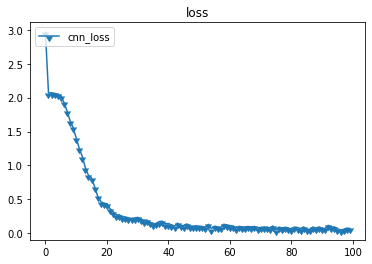

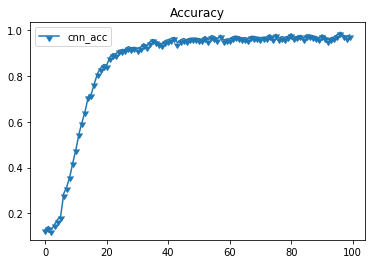

14/14 [==============================] - 6s 452ms/step - loss: 6.2445 - acc: 0.2717
n Test_Accuracy:- 0.27166277
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        86
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        57

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

confusion matrix
[[19  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 61  0  0  0]
 [ 0  0  0  0  0 86  0  0]
 [ 0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0 57]]


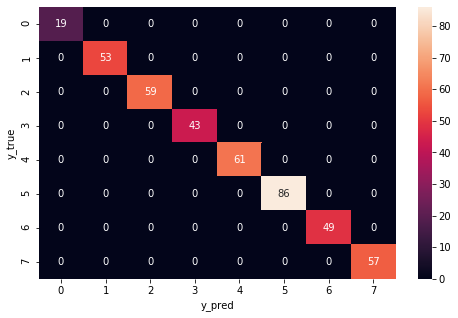

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import sklearn.metrics
print('IUGET RAVDESS CNN ON CHROMA!')
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#RavdessBySpectrogram_PATH="C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/DATABASEInThe_STATEofTheART/RAVDESS_by_Spectro/"
#path_dir = RavdessBySpectrogram_PATH
RavdessByMFCCgram_PATH_IUGET="C:/Users/INSIDE BINARIES/Documents/LABO_PYTHON/DATASET/RAVDESS_by_CHROMA/"
path_dir = RavdessByMFCCgram_PATH_IUGET

datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.3)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    subset='validation'
)

IMAGE_HEIGHT=216
IMAGE_WIDTH=1080
N_CHANNELS=3
N_CLASSES=8
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
#model.compile(
#    loss='sparse_categorical_crossentropy',
#   optimizer=tf.keras.optimizers.RMSprop(),
#    metrics=['accuracy'],
#)

# Train model for 10 epochs, capture the history
#history_cnn = model.fit(train_generator, epochs=10, validation_data=validation_generator)


##FINISH MODIFICATION
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model.fit(train_generator,batch_size=32,epochs=100)
model.save('K_CNNmodelUsingRAVDESSDataSet_CHROMA_IUGET.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [2]:
#Fonction pour Encoder un fichier Audio en Spectrogramme

In [7]:
#Fonction qui prend en entrée un spectrogramme et donne en sortie une émotion
import tensorflow as tf
#Dictionnaires d'émotions
Emotions_Dictionary={0:'Neutral',1:'Calm',2:'Happy',3:'Sad',4:'Angry',5:'Fearful',6:'Disgust',7:'Surpise'}
def EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder):
    #Charger les SpectroGramme des prises de paroles (classés par ordre chrnologique_alphanumérique dans le repertoire)
    path_dir = SpectrogramUtteranceFolder
    PrisesDeParole_datagen = ImageDataGenerator(
                    rescale=1./255)
    PrisesDeParole_generator = PrisesDeParole_datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    shuffle=False)
    
    #charger le model pré entrainé
    #Pretrained_Model_PATH='C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/PretrainedCnnModel/model_4.h5'
    #MyPretrained_Model = tf.keras.models.load_model('MyPretrainedModel')
    MyPretrained_Model=model
    
    #Prediction des emotions
    pred = MyPretrained_Model.predict(PrisesDeParole_generator)
    y_pred = np.argmax(pred, axis=1)
    #Display result
    print(y_pred)
    return y_pred

    

In [9]:
##Testons voir
##SpectrogramUtteranceFolder='./SpectrogrammeLocuteurX/'

#SpectrogramUtteranceFolder=RavdessBySpectrogram_PATH+''
SpectrogramUtteranceFolder="C:/Users/INSIDE BINARIES/Documents/LABO_PYTHON/DATASET/PredictionMFCC/"
PredictedEmotions_labels=EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder)
print('les émotions contenus dans les prises de parole:',[Emotions_Dictionary[ii] for ii in PredictedEmotions_labels])


Found 400 images belonging to 1 classes.
[1 2 5 5 5 2 1 5 5 6 3 2 5 5 5 6 5 4 5 5 5 7 5 3 7 7 5 5 5 5 7 2 2 5 5 5 5
 3 2 5 5 3 5 7 5 2 5 1 3 5 2 6 1 5 3 3 5 2 2 5 0 5 2 7 2 2 5 5 3 5 5 7 7 7
 5 5 7 5 5 5 5 5 5 7 5 5 6 1 4 2 5 5 0 2 5 2 1 0 5 5 7 3 4 1 3 3 5 5 5 5 3
 6 5 2 5 5 5 5 2 2 5 5 2 5 2 5 5 2 5 5 5 2 5 4 3 2 5 5 2 6 5 3 2 3 2 2 3 5
 3 2 2 2 2 5 3 5 1 2 5 2 5 5 5 5 5 2 5 5 5 3 2 2 5 2 2 5 5 5 1 5 5 5 5 5 5
 6 2 5 2 0 6 5 3 5 2 5 5 5 2 2 2 2 3 5 2 5 5 5 5 2 5 5 5 5 2 2 2 5 5 2 3 3
 3 6 5 2 2 5 5 2 5 5 5 2 2 3 5 2 5 5 7 2 5 5 2 3 2 5 2 2 5 5 5 5 5 2 5 5 2
 2 5 3 2 5 5 5 5 2 5 2 3 5 1 3 5 5 5 5 5 7 2 5 5 5 5 2 5 3 5 5 5 2 2 5 2 5
 6 2 2 2 2 5 5 5 5 2 5 2 5 3 5 2 4 5 3 2 5 3 2 2 2 5 2 3 6 2 5 2 5 3 5 2 5
 0 5 5 2 1 5 2 5 4 0 5 5 5 2 5 5 7 2 5 2 1 6 2 5 6 5 5 3 1 3 5 5 4 5 6 2 4
 5 2 5 5 5 5 4 5 7 3 5 5 5 3 1 5 3 5 5 3 5 2 5 5 5 5 5 5 5 5]
les émotions contenus dans les prises de parole: ['Calm', 'Happy', 'Fearful', 'Fearful', 'Fearful', 'Happy', 'Calm', 'Fearful', 'Fearful', 'Disgust

In [5]:
print(list(PredictedEmotions_labels).count(6)*100 / len(list(PredictedEmotions_labels)))


3.25


In [6]:

#yhat = model.predict(train_generator)

path_dir = './SpectrogrammeLocuteurX/'

PrisesDeParole_datagen = ImageDataGenerator(
                    rescale=1./255)
PrisesDeParole_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=False
)


pred = model.predict(PrisesDeParole_generator)
y_pred = np.argmax(pred, axis=1)
print(y_pred)


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: './SpectrogrammeLocuteurX/'

In [ ]:

print(7*24*2*2*2+1*24*2*2)
print((187+201+203+192+191+96+191+192)/8)
print((7*192+96)/8)

In [ ]:
print(1*24*1*2*2)

In [ ]:
print(24*2*2*2)

In [ ]:
model.save('K_CNNmodelUsingRAVDESSDataSet.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.3)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    subset='validation'
)


In [ ]:
accuracy = model.evaluate(train_generator)
print('n', 'Test_Accuracy:-', accuracy[1])


In [ ]:
pred = model.predict(train_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()